In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

## Questions:
1a) Increase sample size to 1000: I expect the means and std of the samples to be closer to the means and std of the populations. The p-value should decrease, as it's even more clear that these samples come from different populations. 

Results: p-value decreased to 10^-300. These can't be from the same sample population

1b) Decrease sample size to 20: I expect mean and std to be farther from those of the populations. P-value should increase, as it is less certain that these sample distributions come from separate populations.

Results: p-value increased to 10^-7. It still appears that these come from different populations, even with only 20 samples from each.

2a) pop1 p to 0.3. These two populations are slightly more similar, so the p-value should increase.

Results: W/ sample size 20, p-value increased to 0.002.

2b) pop2 p to 0.4. These populations are even more similar - p-value should continue to increase.

Results: W/ sample size 20, p-value increased to 0.6. Increasing sample size back to 1000 brought the p-value back down to 10^-50. Having a lot of samples is important!

3) Changing the distribution to lognormal made the populations substantially more similar for the same initial values. With a sample size of 20, the p-value jumped up to 0.9. These samples could have easily come from the same population. Increasing sample size to 1000 brings the p-value back down to the 10^-3 range. 


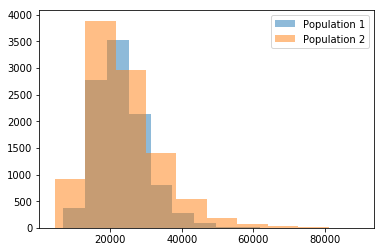

In [38]:
pop1 = np.random.lognormal(10, 0.3, 10000)
pop2 = np.random.lognormal(10,0.4, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

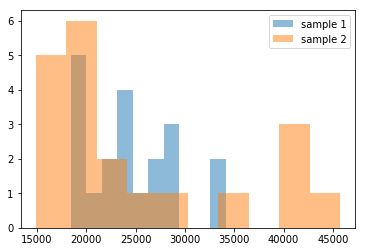

In [55]:
sample1 = np.random.choice(pop1, 20, replace=True)
sample2 = np.random.choice(pop2, 20, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

In [56]:
print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

# Compute the difference between the two sample means.
diff=sample2.mean( ) -sample1.mean()
print(diff)

24663.1956792
24909.3977979
4449.87839846
9742.84908939
246.202118707


In [57]:
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print(diff/diff_se)

0.102796575601


In [58]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=0.10019370817296383, pvalue=0.92094199263223597)
